## 6.5 Machine Learning : Clustering
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
##Python shortcut to folder path##
path = r'C:\Users\hazem\Master Folder- Airbnb Prices in European Cities'

In [4]:
## Importing Data Set ##
df_airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'AirBnb_Europe_Clean.csv'), index_col = False)

In [5]:
df_airbnb.shape

(51611, 14)

In [6]:
df_airbnb.head()

,Unnamed: 0,city,days,accommodation,room_type,person_capacity,cleanliness_rating,guest_rating,bedrooms,city_distance,metro_distance,longitude,latitude,Rating category
0,0,Amsterdam,Weekdays,194,Private room,2,10,93,1,5.0,2.5,4.90569,52.41772,High rate
1,1,Amsterdam,Weekdays,344,Private room,4,8,85,1,0.5,0.2,4.90005,52.37432,Middle rate
2,2,Amsterdam,Weekdays,264,Private room,2,9,87,1,5.7,3.7,4.97512,52.36103,Middle rate
3,3,Amsterdam,Weekdays,434,Private room,4,9,90,2,0.4,0.4,4.89417,52.37663,High rate
4,4,Amsterdam,Weekdays,486,Private room,2,10,98,1,0.5,0.3,4.90051,52.37508,High rate


In [7]:
df_airbnb = df_airbnb.drop(columns = ['Unnamed: 0'])

#### Creating dataset with the numerical variables only as K-means algorithm is unable to handle categorical variables ##

In [8]:
vars_list = ['accommodation', 'person_capacity', 'cleanliness_rating', 'guest_rating', 'bedrooms', 'city_distance', 
            'metro_distance', 'longitude', 'latitude']

In [9]:
vars_list

['accommodation',
 'person_capacity',
 'cleanliness_rating',
 'guest_rating',
 'bedrooms',
 'city_distance',
 'metro_distance',
 'longitude',
 'latitude']

In [10]:
## Importing Data Set ##
df_vars = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'AirBnb_Europe_Clean.csv'), usecols = vars_list)

In [11]:
# Clean the extreme values from the "accommodation" variable observed 

df_vars = df_vars[df_vars['accommodation'] <=2000] 

In [12]:
df_vars.shape

(51475, 9)

### 2. The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_vars).score(df_vars) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2022006359.0347214,
 -774983241.9797101,
 -411106297.6631413,
 -253317137.72343752,
 -169027386.0686871,
 -123671794.19695568,
 -94680457.19241899,
 -75579160.39203529,
 -62352569.94708769]

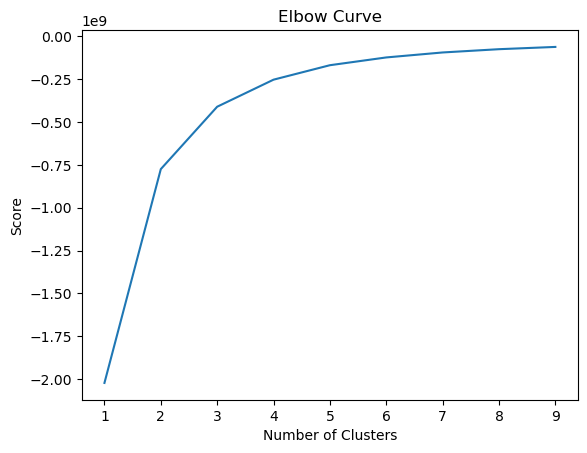

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###### We can see the big jump from 2 to 3 on X-axis, then a slight raise from 3 to 4, and then the line almost straight

### 3. k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [18]:
kmeans.fit(df_vars)

KMeans(n_clusters=3)

In [19]:
df_vars['clusters'] = kmeans.fit_predict(df_vars)

In [20]:
df_vars['clusters'].value_counts()

0    37624
2    11630
1     2221
Name: clusters, dtype: int64

In [21]:
df_vars.head()

,accommodation,person_capacity,cleanliness_rating,guest_rating,bedrooms,city_distance,metro_distance,longitude,latitude,clusters
0,194,2,10,93,1,5.0,2.5,4.90569,52.41772,0
1,344,4,8,85,1,0.5,0.2,4.90005,52.37432,2
2,264,2,9,87,1,5.7,3.7,4.97512,52.36103,0
3,434,4,9,90,2,0.4,0.4,4.89417,52.37663,2
4,486,2,10,98,1,0.5,0.3,4.90051,52.37508,2


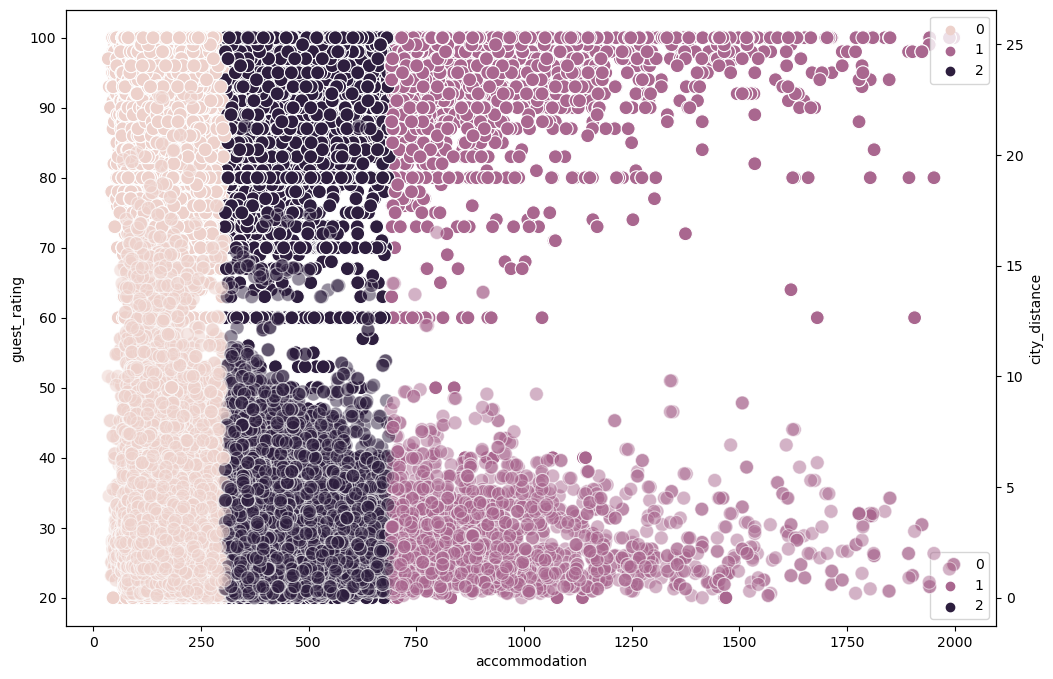

In [25]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=df_vars['accommodation'], y=df_vars['guest_rating'], hue=kmeans.labels_, s=100)
ax2 = ax.twinx()  # Create a secondary y-axis
ax2 = sns.scatterplot(x=df_vars['accommodation'], y=df_vars['city_distance'], hue=kmeans.labels_, s=100, alpha=0.5)  # Plot on the secondary y-axis

ax.grid(False)  # This removes the grid from the background.
ax.set_xlabel('accommodation')  # Label x-axis.
ax.set_ylabel('guest_rating')  # Label y-axis.
ax2.set_ylabel('city_distance')  # Label secondary y-axis.

plt.show()

##### After removing the maximum values for accommodation variarble <=2000, and consider more dependent variables together into a model (guest_rating & city_distance). The clusters are more sense and represented between the variables (0 to 300) (300 to 700) (700 to >= 2000)

In [23]:
df_vars.loc[df_vars['clusters'] == 2, 'cluster'] = 'dark purple'
df_vars.loc[df_vars['clusters'] == 1, 'cluster'] = 'purple'
df_vars.loc[df_vars['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
## alculate the descriptive statistics the clusters using the groupby() function ##

df_vars.groupby('cluster').agg({'accommodation':['mean', 'median'], 
                         'guest_rating':['mean', 'median'], 
                         'city_distance':['mean', 'median']})

accommodation        guest_rating        city_distance       
                     mean median         mean median          mean median
cluster                                                                  
dark purple    430.251849  405.0    91.892347   95.0      3.075486    2.6
pink           180.561477  175.0    92.813683   95.0      3.258266    2.6
purple         944.620891  860.0    93.047726   96.0      2.722467    2.3

#### The k-means clustering model has showed  insights. However,  I believe that kind of analysis (K-mean algorithm) wouldn't fit with that kind of data that includes important categorical variables like (city & days). It wouldn't produce a series interesting insights in the analysis. 

In [26]:
df_vars.columns

Index(['accommodation', 'person_capacity', 'cleanliness_rating',
       'guest_rating', 'bedrooms', 'city_distance', 'metro_distance',
       'longitude', 'latitude', 'clusters', 'cluster'],
      dtype='object')